# Multiple Linear Regression

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


BoomBikes has contracted a consulting company to understand the factors on which the demand for these shared bikes depends.

Essentially, the company wants —

- To create a linear model that quantitatively relates demand of shared bikes with variables such as season, holiday , etc.

- To know the accuracy of the model, i.e. how well these variables can predict bikes demand.

## Step 1: Reading and Understanding the Data

In [2]:

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Here we will import some importance libraries like Numpy and Pandas
import pandas as pd
import numpy as np

In [4]:
# reading and checking the head of the bike_dataset
bike_data = pd.read_csv("day.csv")
bike_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike_data dataframe

As we can see that we have two types of variables for the same information. First, we have numerical variables like temp, atemp, hum and windspeed. Second, we have categorical variables like season, yr, month. Both of these types of variables provide us with the same information. We will first plot the categorical variables on the boxplot to represent their relation with the target variable "Cnt" and then later on we will use the numerrical variables to predict the same in linear regression model.

In [5]:
bike_data.shape

(730, 16)

In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the target variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

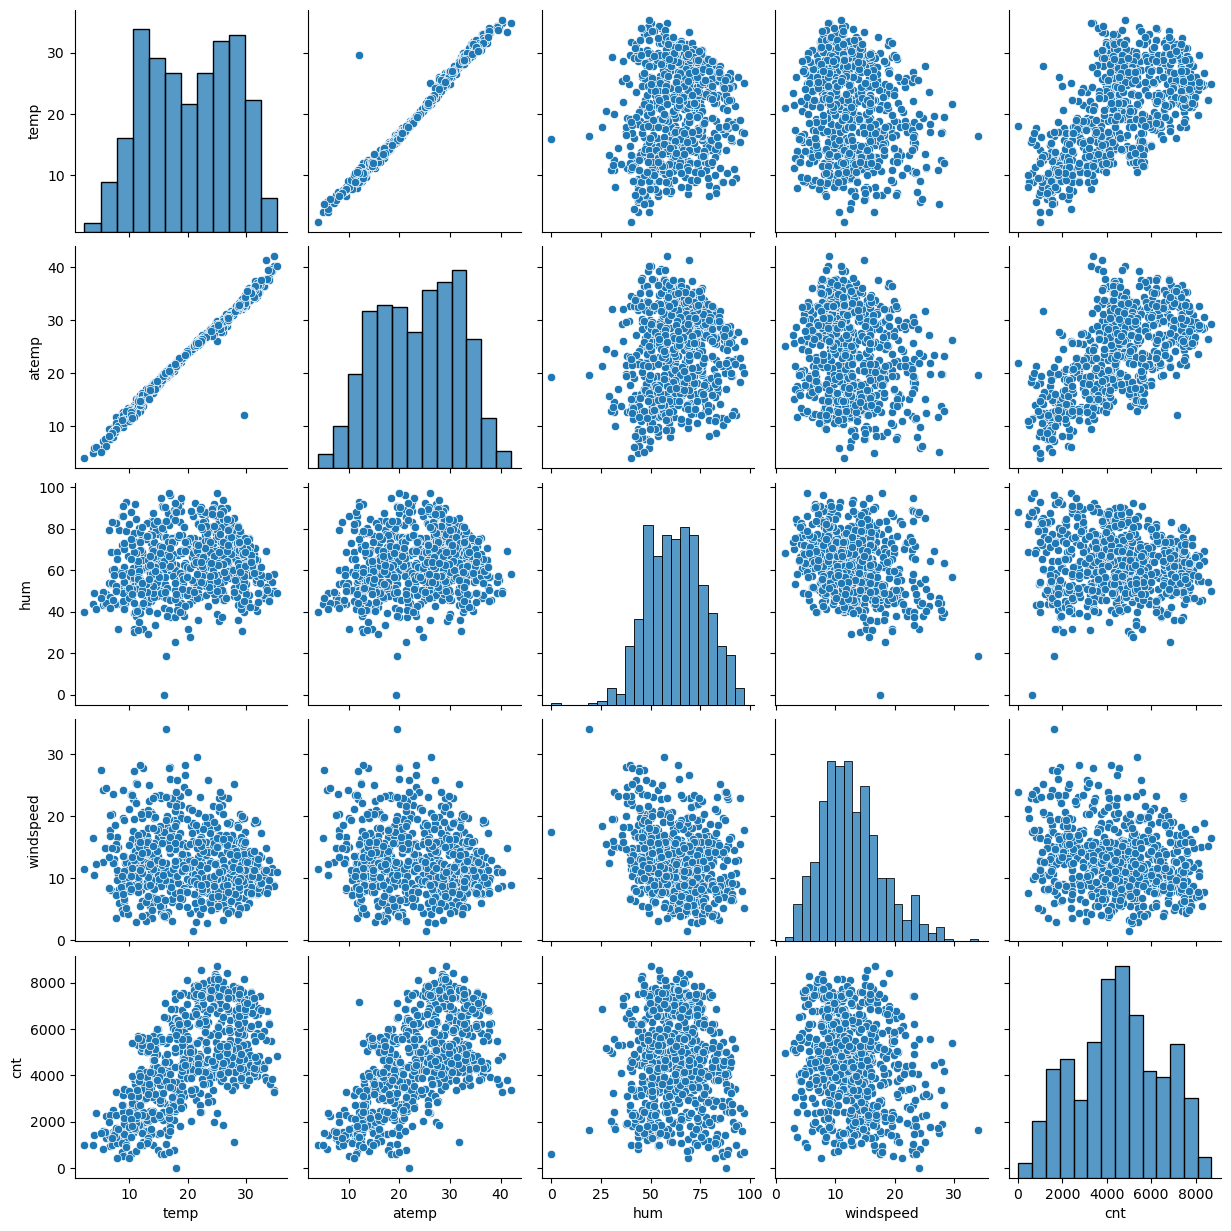

In [9]:
# Creating pairplot for all the variables.
num_var_list = ["temp","atemp","hum","windspeed","cnt"]
num_var = bike_data[num_var_list]
sns.pairplot(num_var)
plt.show()

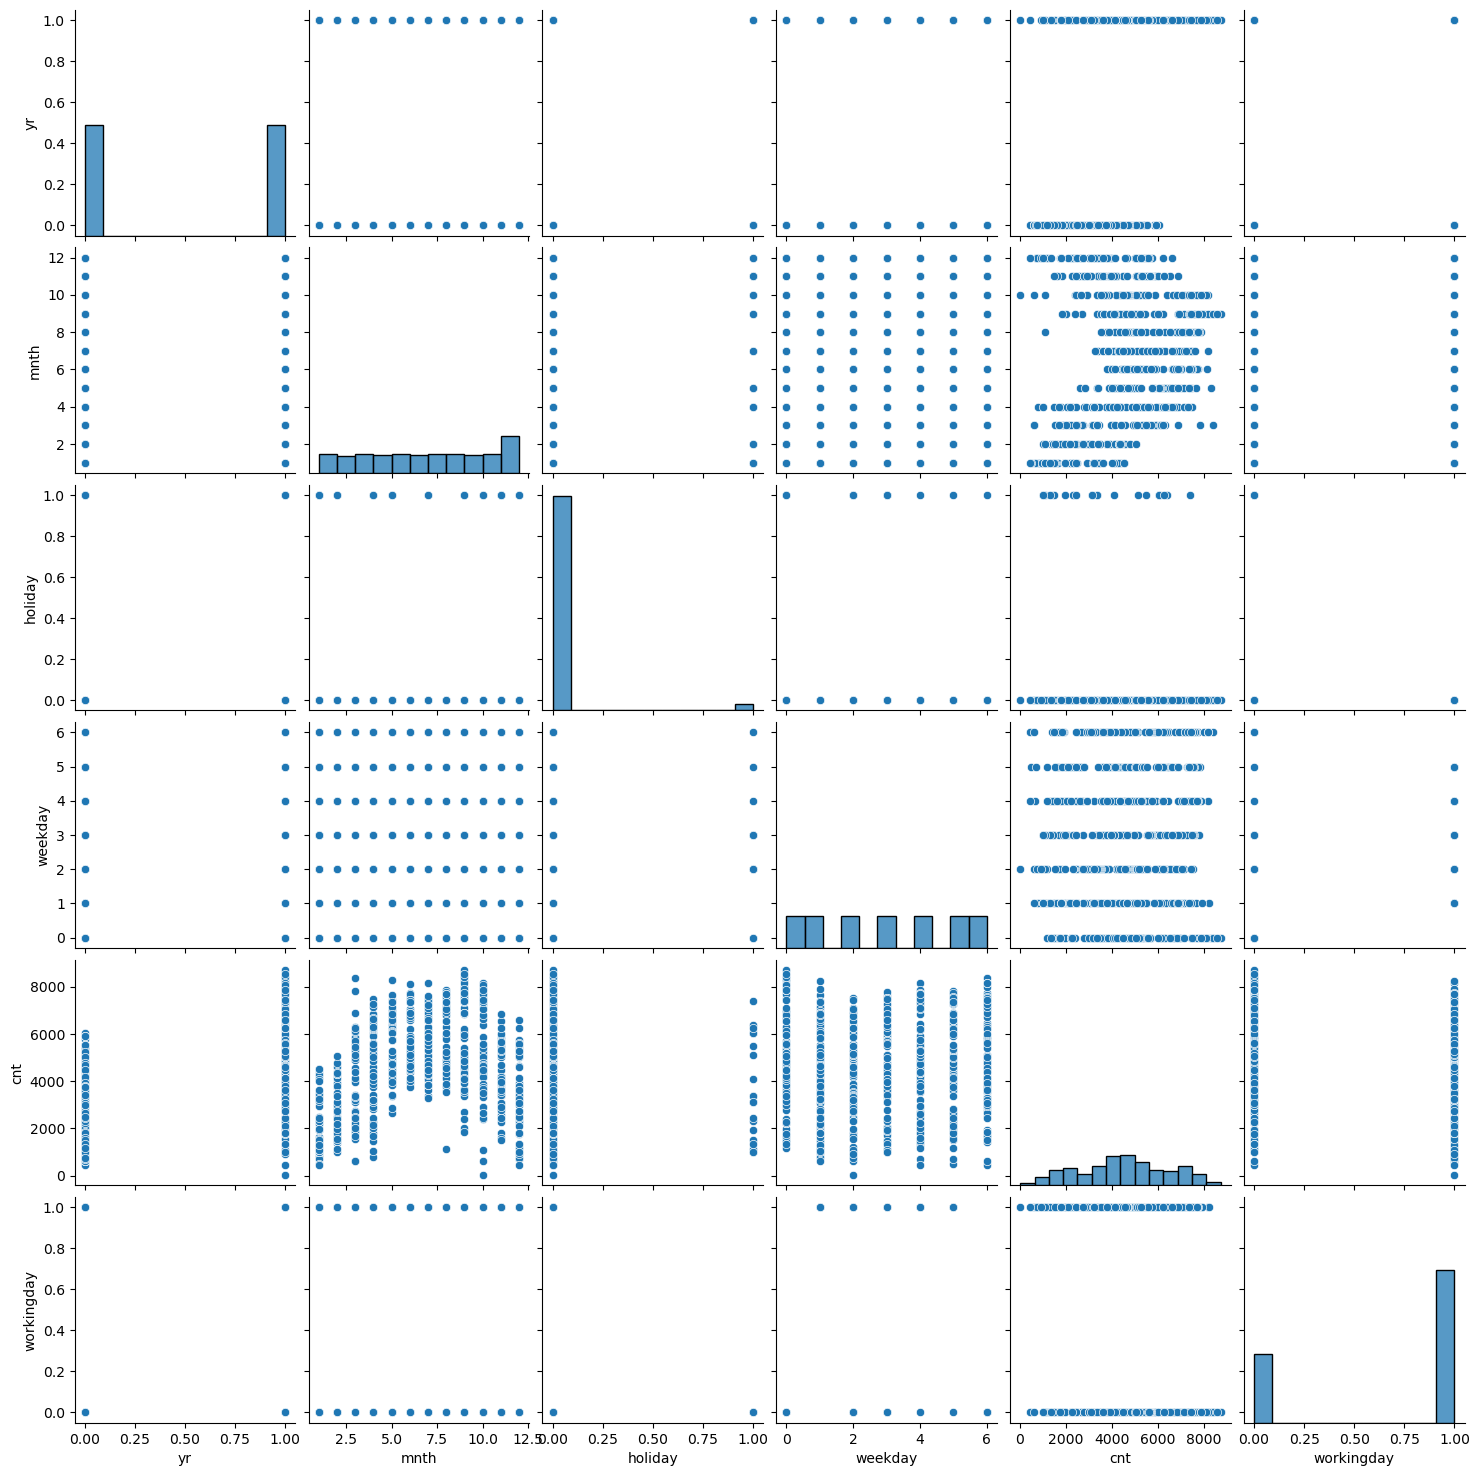

In [10]:
# Creating pairplot for all the variables.
num_var_list = ["yr","mnth","holiday","weekday","cnt","workingday"]
num_var = bike_data[num_var_list]
sns.pairplot(num_var)
plt.show()


### It is clear from the above pariplot that there is a relation between the target variable,cnt and temp and atemp. But if we look closely, there is a Multicollinearity betwwen temp and atemp. We can use either both of them for our model building.

# Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

## Step 2: Preparing the Data for the better representation of the categorical variables
Here first we will change the names of the features of variable so that we can understand their representation much better and later we will create dummy variables for Season, mnth, weekday, weathersit.


In [11]:
# We will change values of the some of categorical variables for better understanding and then representation.
# Season
bike_data.season = bike_data.season.map({1:"spring", 2:"summer", 3:"fall/autumn", 4:"winter"})
# Year
bike_data.yr = bike_data.yr.map({0:2018, 1:2019})
# weathersit
bike_data.weathersit = bike_data.weathersit.map({1:"Clear",2:"Mist",3:"Light Snow",4:"Heavy Rain"})
# workingday
bike_data.workingday = bike_data.workingday.map({1:"Working Day",0:"Holiday"})

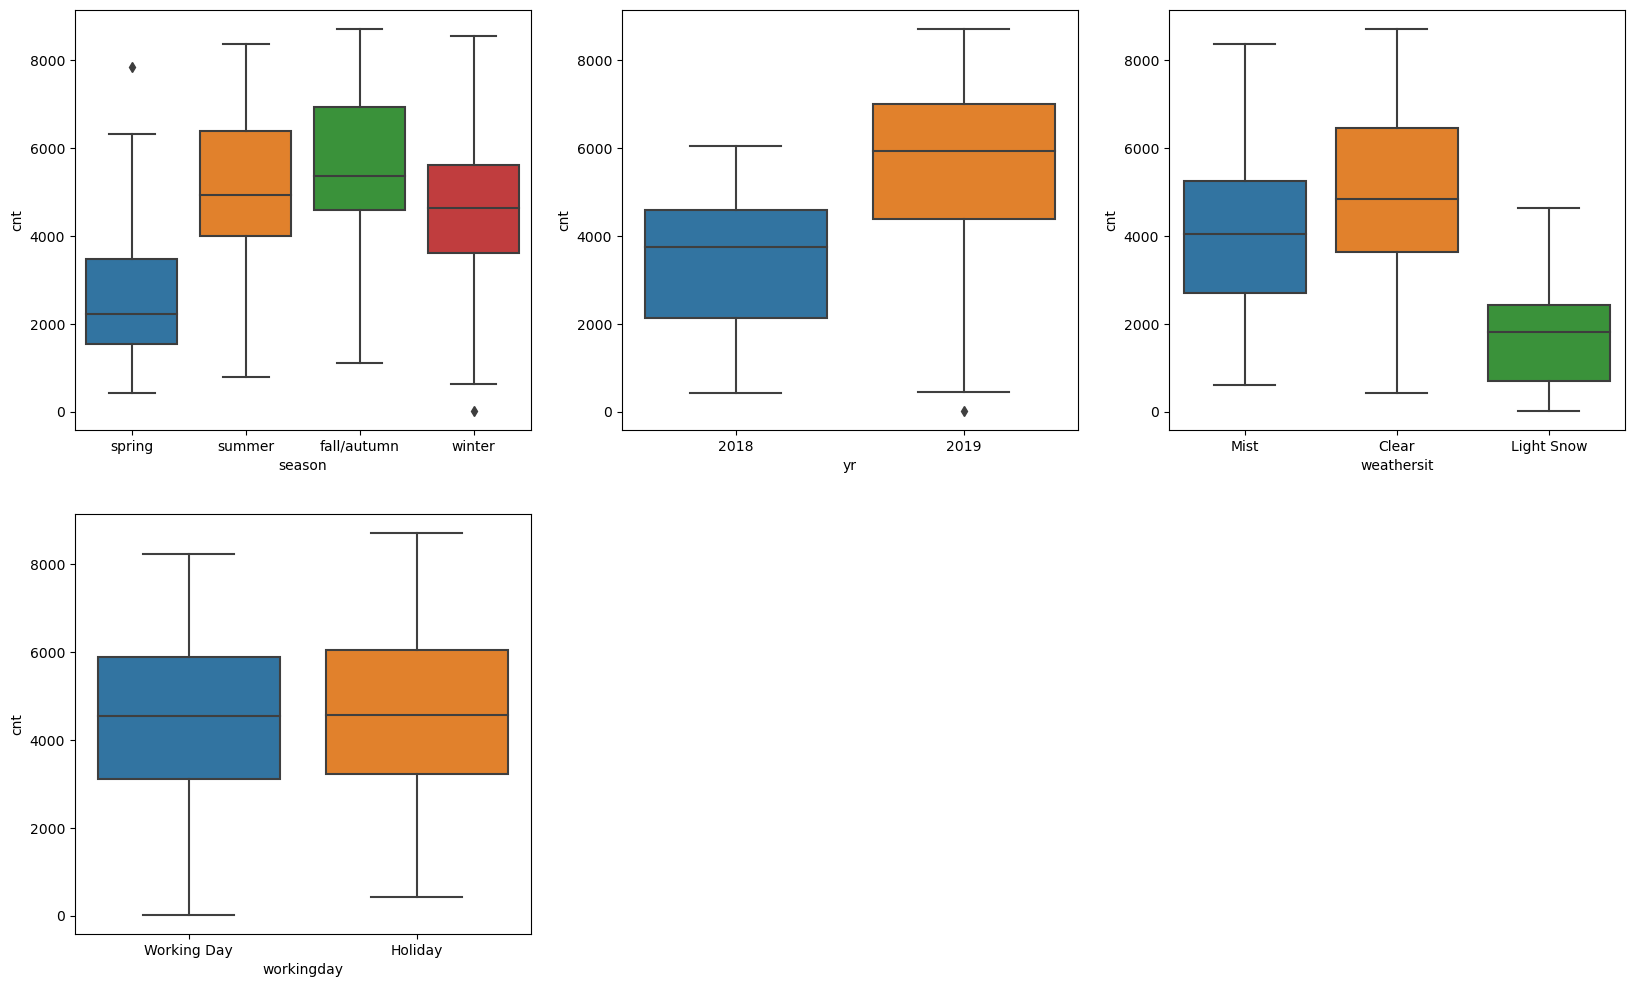

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)


plt.show()

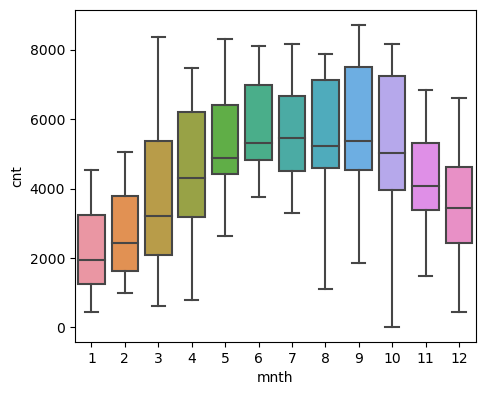

In [13]:
# we need to create boxplot for the variable mnth separatly since we have a lot of categories in it. 
plt.figure(figsize=(30, 25))

plt.subplot(5,5,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)

plt.show()

## By looking at these boxplots, it is clear that the:
1. Demand is very high in the season of autumn and summer from month of May to October. 
2. Clear weather attracts more people to borrow more bikes.
3. Demand was incresing in the year 2019 but due to Corona, there must have been a drop in the demand for the bikes becuase of quarantine situations around the world

It is clear after looking the data for the first time that it is a time series data as defined by the varaible dteday. We will try to see how this time variable affects our model building and how it affects the demand of bikes. But we need to find the demand on much higher scale period rather than checking the demand on the day to day basis. For that, we have mnth and yr variable with season variable that will make our work easier. We can remove dteday variable as it is of no use here.

In [14]:
bike_data.drop("dteday", axis = 1, inplace  = True)


# we can also drop instant variable 
bike_data.drop("instant", axis = 1, inplace  = True)

bike_data.drop("casual", axis = 1, inplace  = True)

bike_data.drop("registered", axis = 1, inplace  = True)


In [15]:
# We will change values of the those categorical variables for better understanding and then representation of correlation between the independent and target variable

# Year
bike_data.yr = bike_data.yr.map({2018:0, 2019:1})
# workingday
bike_data.workingday = bike_data.workingday.map({"Working Day":1,"Holiday":0})

In [16]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Dummy Variables

In [17]:
# First we need to map the categories of mnth and weekday so that we can create dummy variables with the name of the column specific to particular month and weekday
bike_data.mnth = bike_data.mnth.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
bike_data.weekday = bike_data.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})

season = pd.get_dummies(bike_data['season'], dtype = int, drop_first = True)
mnth = pd.get_dummies(bike_data['mnth'], dtype = int, drop_first = True)
weekday = pd.get_dummies(bike_data['weekday'], dtype = int, drop_first = True)
weathersit = pd.get_dummies(bike_data['weathersit'], dtype = int, drop_first = True)

In [18]:
# Now we need to concat theese new variables with our primary dataframe
bike_data = pd.concat([bike_data, season, mnth, weekday, weathersit], axis = 1)

In [19]:
# Now we can remove these categorical variables since now they are redundant variables;
bike_data.drop(['mnth'], axis = 1, inplace = True)
bike_data.drop(['season'], axis = 1, inplace = True)
bike_data.drop(['weekday'], axis = 1, inplace = True)
bike_data.drop(['weathersit'], axis = 1, inplace = True)

In [20]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    int32  
 9   summer      730 non-null    int32  
 10  winter      730 non-null    int32  
 11  Aug         730 non-null    int32  
 12  Dec         730 non-null    int32  
 13  Feb         730 non-null    int32  
 14  Jan         730 non-null    int32  
 15  Jul         730 non-null    int32  
 16  Jun         730 non-null    int32  
 17  Mar         730 non-null    int32  
 18  May         730 non-null    int32  
 19  Nov         730 non-null    i

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [21]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_data_train, bike_data_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
print(bike_data_train.shape)
print(bike_data_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features 

As we know, scaling doesn't impact our model. Here we can see that variables like temp, atemp, hum	and  windspeed have different scale of integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. As you know, there are two common ways of rescaling:

1. Min-Max scaling (Normalisation) between 0 and 1
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Here we are creating an instance of MinMaxScaler class 
scaler = MinMaxScaler()

In [25]:
# Apply scaler() to all the columns under num_vars variable
num_vars = ['temp', 'atemp', 'hum', 'windspeed',"cnt"]

bike_data_train[num_vars] = scaler.fit_transform (bike_data_train[num_vars])

In [26]:
bike_data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


# Step 5: Training the Model

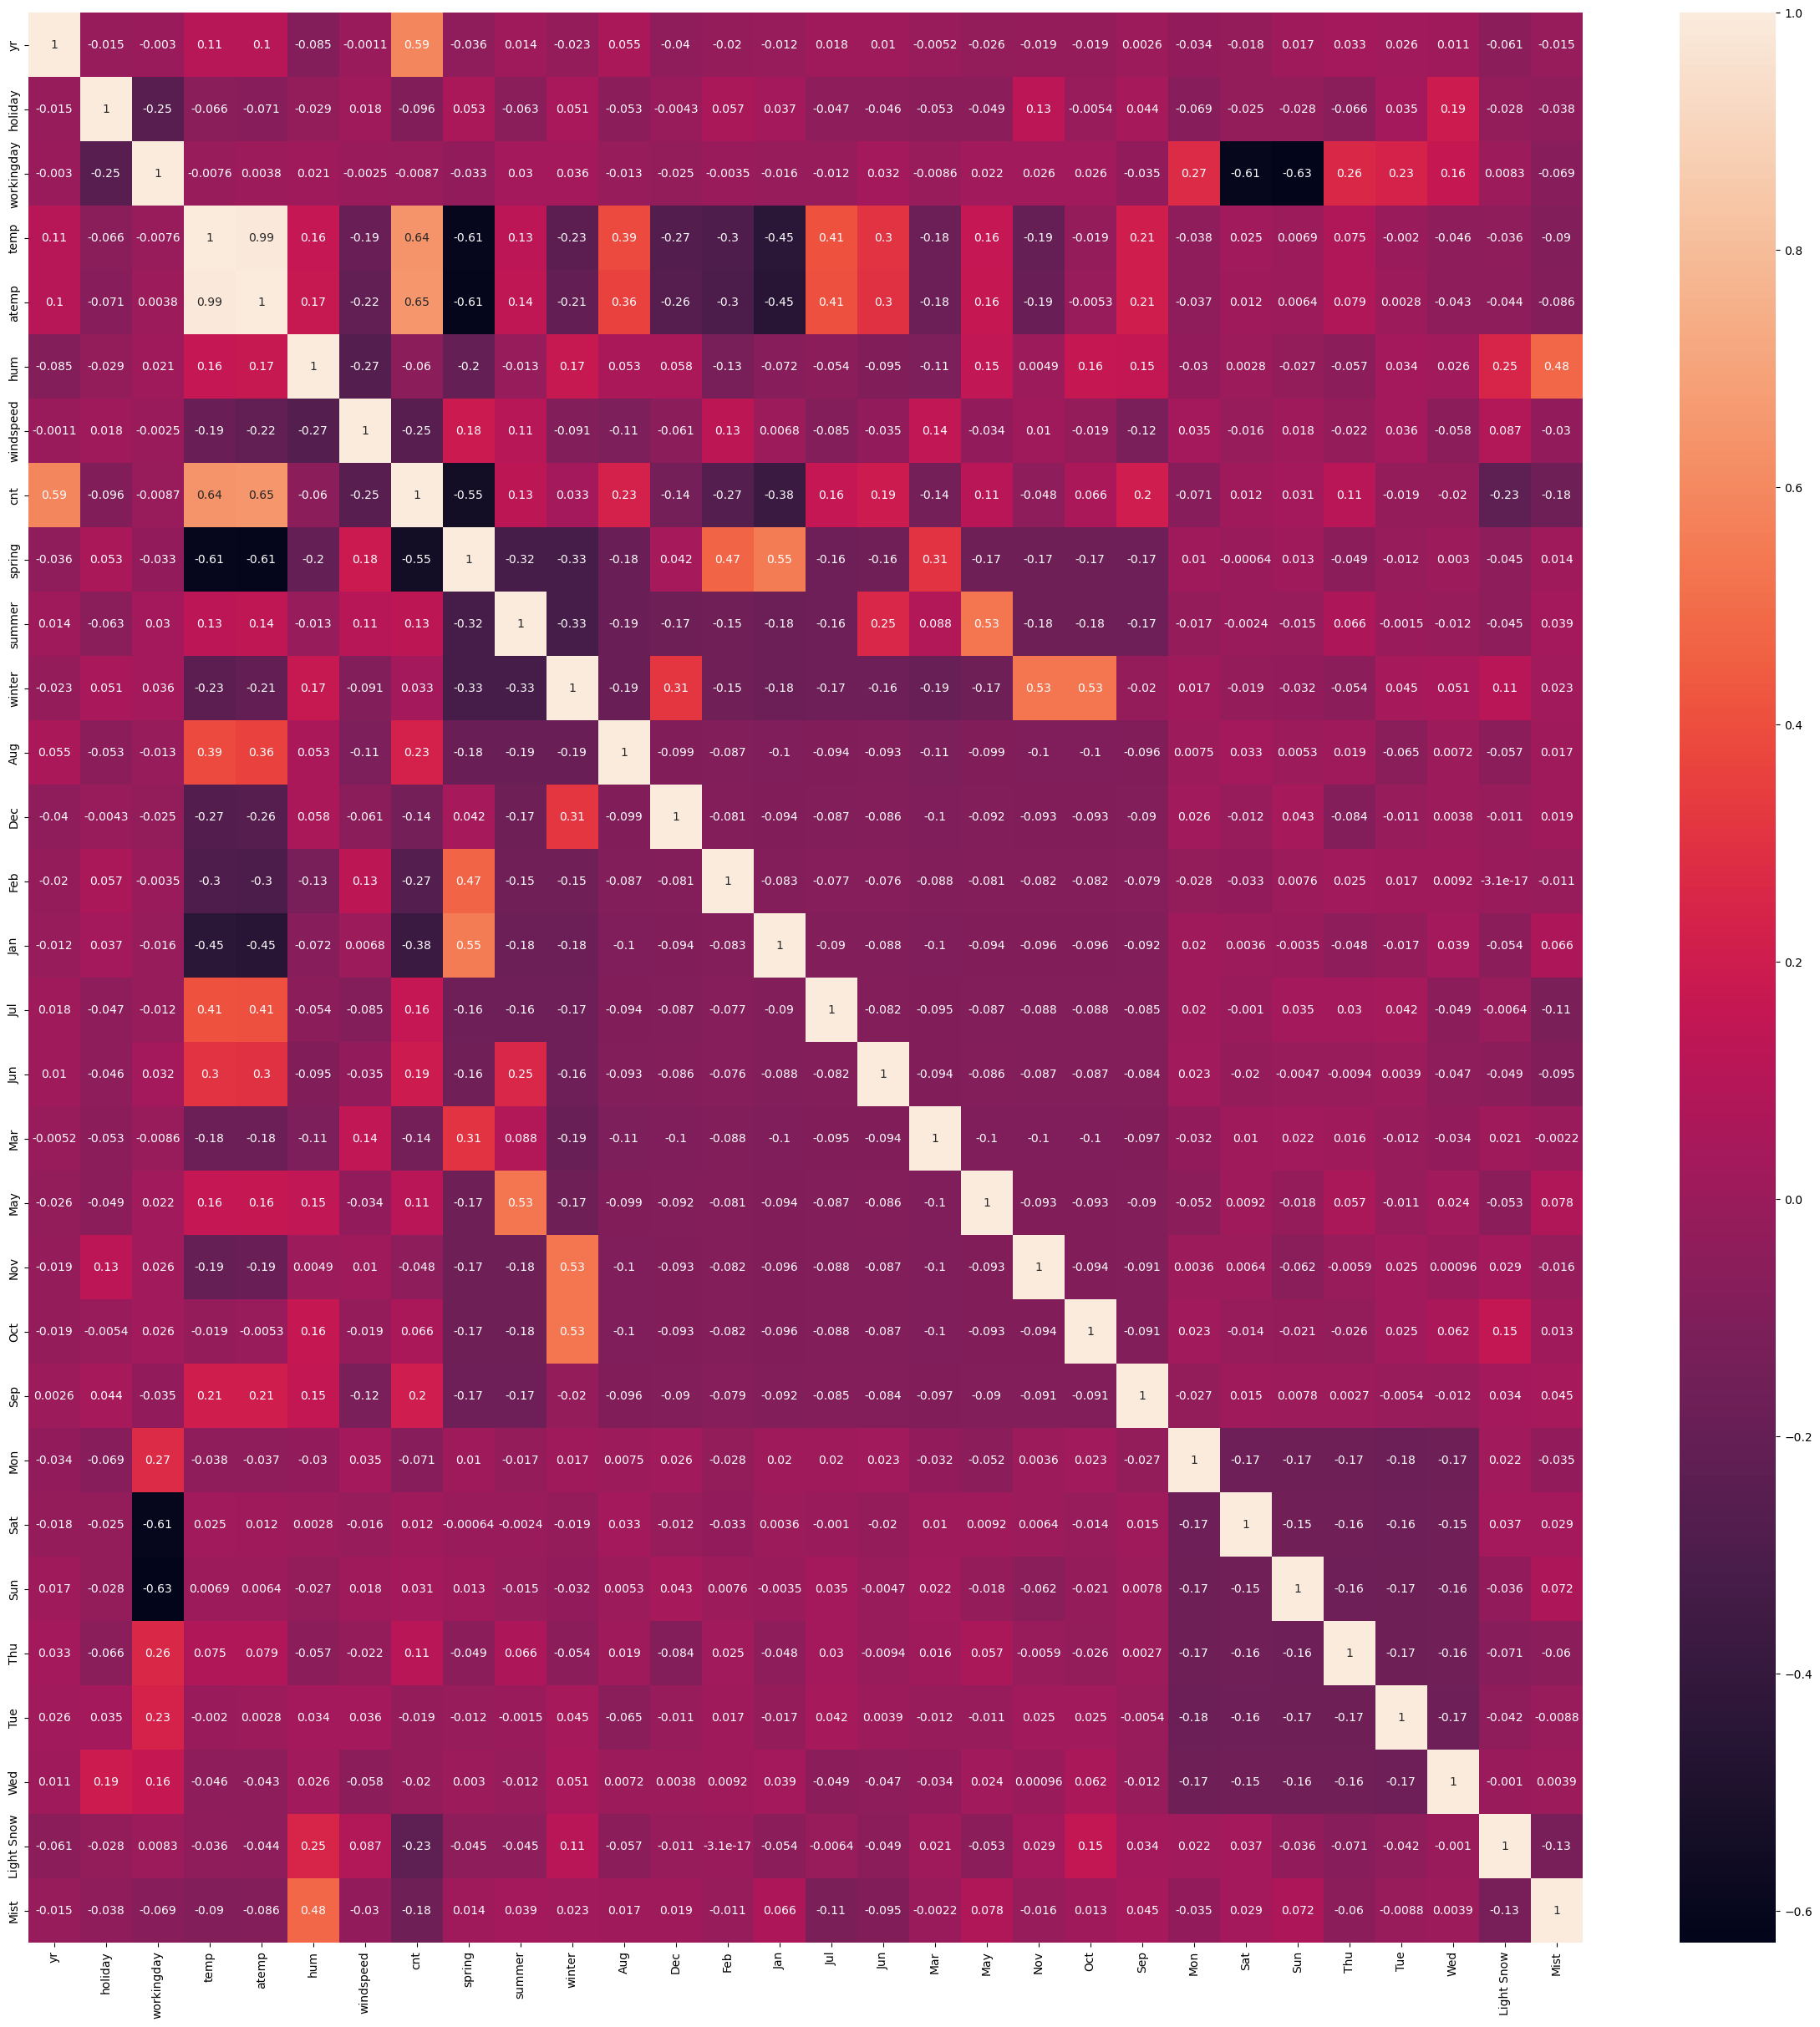

In [27]:
# Now the question arises that which of all the variable should we consider for builing the model?
# First we will plot a heat map to visualise the correlation between the variables
plt.figure(figsize = (30, 30))
sns.heatmap(bike_data_train.corr(), annot = True)
plt.show()

As we can see that temp and atemp variables have highest correlation with the target variable. We will now build our MLR model to check if this fact stands to be true or not

### Dividing train data into X and Y sets for the model building

In [28]:
y_train = bike_data_train.pop('cnt')
X_train = bike_data_train

In [29]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [30]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Step 6: Building a linear model

Fit a regression line through the training data using `SkLearn`using RFE

# Recursive Feature Elimination (RFE)

In [31]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [32]:
# Running RFE with the output number of the variable equal to 20.
# But first we will need to create an instance of LR to use RFE later on it.

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [33]:
# This is the list of those variables that have been selected by the REF feature.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 10),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('Mon', False, 4),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 8),
 ('Tue', False, 3),
 ('Wed', False, 6),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep',
       'Sat', 'Sun', 'Light Snow', 'Mist'],
      dtype='object')

In [35]:
# This is the list of those variables that have not been selected by the REF feature.
X_train.columns[~rfe.support_]

Index(['Aug', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Thu', 'Tue', 'Wed'], dtype='object')

### Building model using statsmodel for the detailed statistics

In [36]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe= X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Dec,Feb,Jan,Jul,Nov,Sep,Sat,Sun,Light Snow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,1,0,1


In [37]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,Dec,Feb,Jan,Jul,Nov,Sep,Sat,Sun,Light Snow,Mist
653,1.0,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,...,0,0,0,0,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,...,0,0,0,0,0,0,0,1,0,1
728,1.0,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,...,0,0,0,0,0,0,0,1,0,1


In [38]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [39]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.3
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.51e-185
Time:                        11:21:35   Log-Likelihood:                 518.74
No. Observations:                 510   AIC:                            -995.5
Df Residuals:                     489   BIC:                            -906.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3804      0.081      4.711      0.0

In [40]:
# We will remove those variables having high P-value
X_train_new = X_train_rfe.drop(["workingday","atemp","Feb","Sat","Sun","hum"], axis = 1)

#### Rebuilding a new model without these variables having high p-value

In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [42]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [43]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          1.57e-186
Time:                        11:21:35   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.0

In [44]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light Snow', 'Mist'],
      dtype='object')

In [45]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [46]:
# Calculate the VIFs for the new model to determine the multicoliniarity so that we can remove any variable which is redundant in this model.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,Nov,1.80
8,Jan,1.66
9,Jul,1.59
13,Mist,1.56


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [47]:
y_train_cnt = lm.predict(X_train_lm)

In [48]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

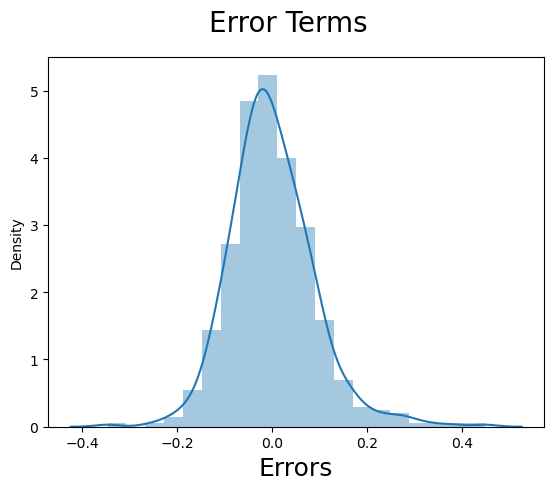

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_cnt- y_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions


#### Applying the scaling on the test sets

In [50]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed',"cnt"]
bike_data_test[num_vars] = scaler.transform(bike_data_test[num_vars])

In [51]:
bike_data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


#### Dividing into X_test and y_test

In [52]:
y_test = bike_data_test.pop('cnt')
X_test = bike_data_test

In [53]:
# Now we will use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [54]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

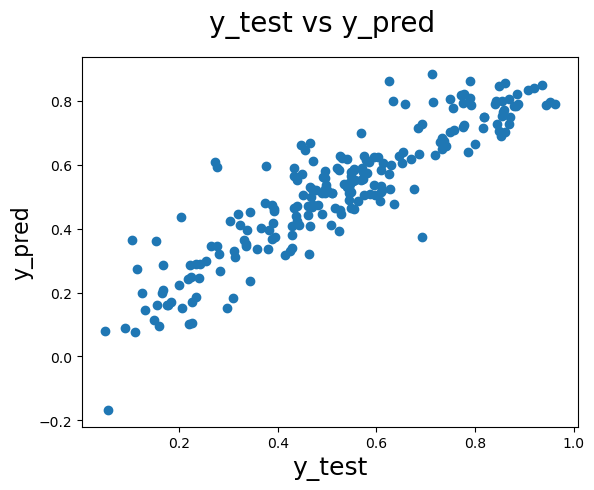

In [55]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8132736736429256



We can see that the equation of our best fitted line is:

$ cnt = 0.234  \times  yr  + (-0.0919)  \times  holiday  + 0.4377 \times temp  + (-0.1586) \times windspeed  + (-0.0716) \times  spring  + 0.0333 \times summer  + 0.0887 \times winter  + (-0.0445) \times Dec   + (-0.0503) \times Jan  + (-0.0504) \times Jul  + (-0.0419) \times Nov  + (0.0682) \times Sep  + (-0.2929) \times Light Snow  + (-0.0814) \times Mist $
